### Text classification using CNNs

The goal here is to determine whether an IMDB review is positive or negative.

Via this great [wandb](https://www.youtube.com/watch?v=8YsZXTpFRO0&t=2s) tutorial. 

This lesson uses [GloVe](https://nlp.stanford.edu/projects/glove/) word embeddings.

In [8]:
# import packages
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D

import numpy as np

from load_amazon_data import load_amazon_smaller

In [2]:
# import data
(train_summary, train_review_text, train_labels), (test_summary, test_review_text, test_labels) = load_amazon_smaller()
(X_train, y_train), (X_test, y_test) = (train_summary, train_labels), (test_summary, test_labels)

In [3]:
# config variables
VOCAB_SIZE = 1000
MAXLEN = 1000
BATCH_SIZE = 32
EMBEDDING_DIMS = 50
FILTERS = 32
KERNEL_SIZE = 3
HIDDEN_DIMS = 250
EPOCHS = 10

In [6]:
# tokenize our text strings
tokenizer = text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

In [7]:
# pad out the X sequences, essentially adding empty words to make the reviews equal length
X_train = sequence.pad_sequences(X_train, maxlen=MAXLEN)
X_test  = sequence.pad_sequences(X_test, maxlen=MAXLEN)

In [11]:
# create model
model = Sequential()
# This embedding layer takes in the top VOCAB_SIZE words as inputs
# as well as the number of numbers we're translating a word into (EMBEDDING_DIMS)
model.add(Embedding(VOCAB_SIZE,
                    EMBEDDING_DIMS,
                    input_length=MAXLEN))
model.add(Dropout(0.5))
model.add(Conv1D(FILTERS,
                 KERNEL_SIZE,
                 padding='valid', # no padding
                 activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(HIDDEN_DIMS, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))

W0929 20:01:12.917228 10176 deprecation_wrapper.py:119] From C:\Users\jfields\.conda\envs\keras-cpu\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0929 20:01:12.921209 10176 deprecation.py:323] From C:\Users\jfields\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 20000 samples
Epoch 1/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.3607 - acc: 0.8824 - val_loss: 0.4217 - val_acc: 0.8534
Epoch 2/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.3325 - acc: 0.8835 - val_loss: 0.3935 - val_acc: 0.8534
Epoch 3/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.3162 - acc: 0.8843 - val_loss: 0.3904 - val_acc: 0.8577
Epoch 4/10
20000/20000 [==============================] - 99s 5ms/step - loss: 0.3050 - acc: 0.8891 - val_loss: 0.3953 - val_acc: 0.8596
Epoch 5/10
20000/20000 [==============================] - 100s 5ms/step - loss: 0.2978 - acc: 0.8890 - val_loss: 0.4021 - val_acc: 0.8596
Epoch 6/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2925 - acc: 0.8905 - val_loss: 0.4147 - val_acc: 0.8600
Epoch 7/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.2884 - acc: 0.8934 - val_loss: 0.4114 - val_

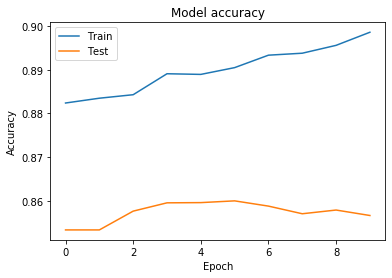

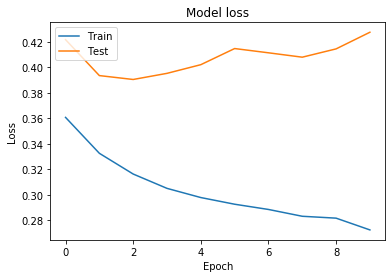

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()